In [ ]:
# Load the dataset
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

file_path = 'Sleep_health_and_lifestyle_dataset.csv'
data = pd.read_csv(file_path)

data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
# Preprocessing
data = data.drop('Occupation', axis=1)
print(data.columns)
data = pd.get_dummies(data, columns=['Gender', 'BMI Category', 'Sleep Disorder'], drop_first=True)

scaler = MinMaxScaler()
data.head()

Index(['Person ID', 'Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Gender_Male,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Sleep Apnea
0,1,27,6.1,6,42,6,126/83,77,4200,True,False,False,True,False
1,2,28,6.2,6,60,8,125/80,75,10000,True,False,False,False,False
2,3,28,6.2,6,60,8,125/80,75,10000,True,False,False,False,False
3,4,28,5.9,4,30,8,140/90,85,3000,True,False,True,False,True
4,5,28,5.9,4,30,8,140/90,85,3000,True,False,True,False,True


In [ ]:
data[['Systolic BP', 'Diastolic BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(float)

data['Average BP'] = (data['Systolic BP'] + data['Diastolic BP']) / 2

data.drop('Blood Pressure', axis=1, inplace=True)
data.drop('Systolic BP', axis=1, inplace=True)
data.drop('Diastolic BP', axis=1, inplace=True)


data.head()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Sleep Apnea,Average BP
0,1,27,6.1,6,42,6,77,4200,True,False,False,True,False,104.5
1,2,28,6.2,6,60,8,75,10000,True,False,False,False,False,102.5
2,3,28,6.2,6,60,8,75,10000,True,False,False,False,False,102.5
3,4,28,5.9,4,30,8,85,3000,True,False,True,False,True,115.0
4,5,28,5.9,4,30,8,85,3000,True,False,True,False,True,115.0


In [ ]:
# correlation matrix
numeric_df = data.select_dtypes(include=['number']).drop(data.columns[0], axis=1)
numeric_df.corr()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Average BP
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973,0.604604
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533,-0.175455
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791,-0.117334
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723,0.319492
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829,0.098604
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309,0.285851
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000,0.165871
Average BP,0.604604,-0.175455,-0.117334,0.319492,0.098604,0.285851,0.165871,1.000000


In [ ]:
# Normalization
normalize = ['Age', 'Heart Rate', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Daily Steps', 'Average BP']
data[normalize] = scaler.fit_transform(data[normalize])
scaler = MinMaxScaler()
data[normalize] = scaler.fit_transform(data[normalize])
data.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Sleep Apnea,Average BP
0,1,0.00000,0.111111,6,0.2,0.6,0.571429,0.171429,True,False,False,True,False,0.422222
1,2,0.03125,0.148148,6,0.5,1.0,0.476190,1.000000,True,False,False,False,False,0.333333
2,3,0.03125,0.148148,6,0.5,1.0,0.476190,1.000000,True,False,False,False,False,0.333333
3,4,0.03125,0.037037,4,0.0,1.0,0.952381,0.000000,True,False,True,False,True,0.888889
4,5,0.03125,0.037037,4,0.0,1.0,0.952381,0.000000,True,False,True,False,True,0.888889


In [ ]:
# Linear Regression
from sklearn.model_selection import train_test_split

X = data.drop(['Quality of Sleep'], axis=1)
y = data['Quality of Sleep']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)

print(mse)
print(r_squared)


0.06028888935960727
0.9600371196502722


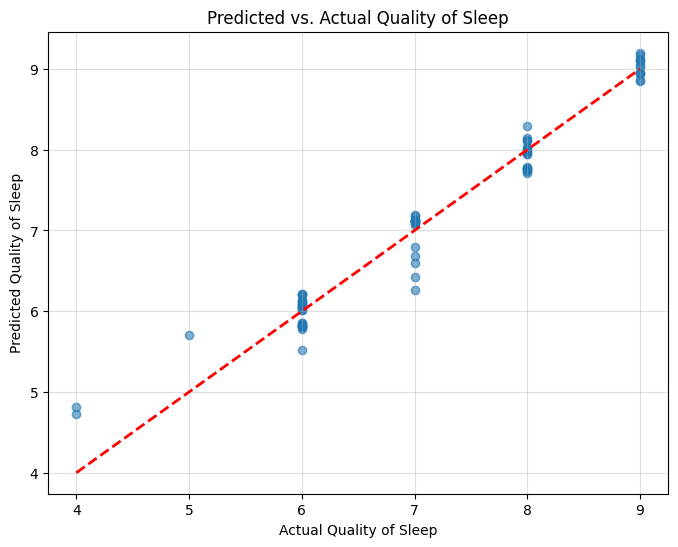

In [ ]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Predicted vs. Actual Quality of Sleep')
plt.xlabel('Actual Quality of Sleep')
plt.ylabel('Predicted Quality of Sleep')
plt.grid(alpha=0.4)
plt.show()

Path to dataset files: /root/.cache/kagglehub/datasets/uom190346a/sleep-health-and-lifestyle-dataset/versions/2


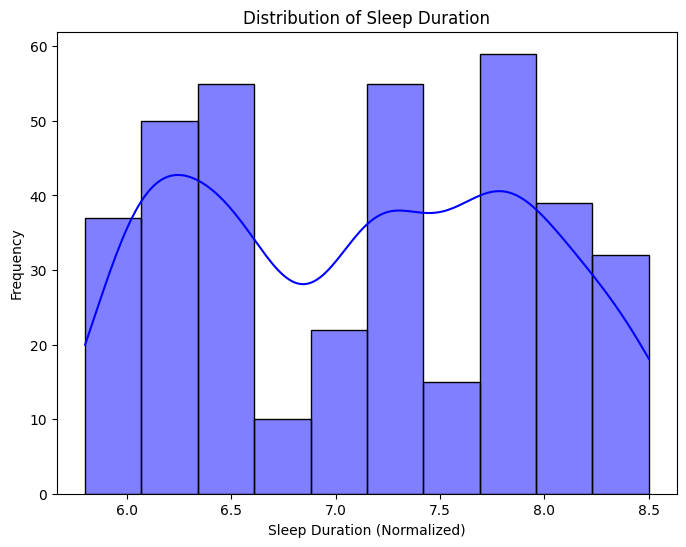

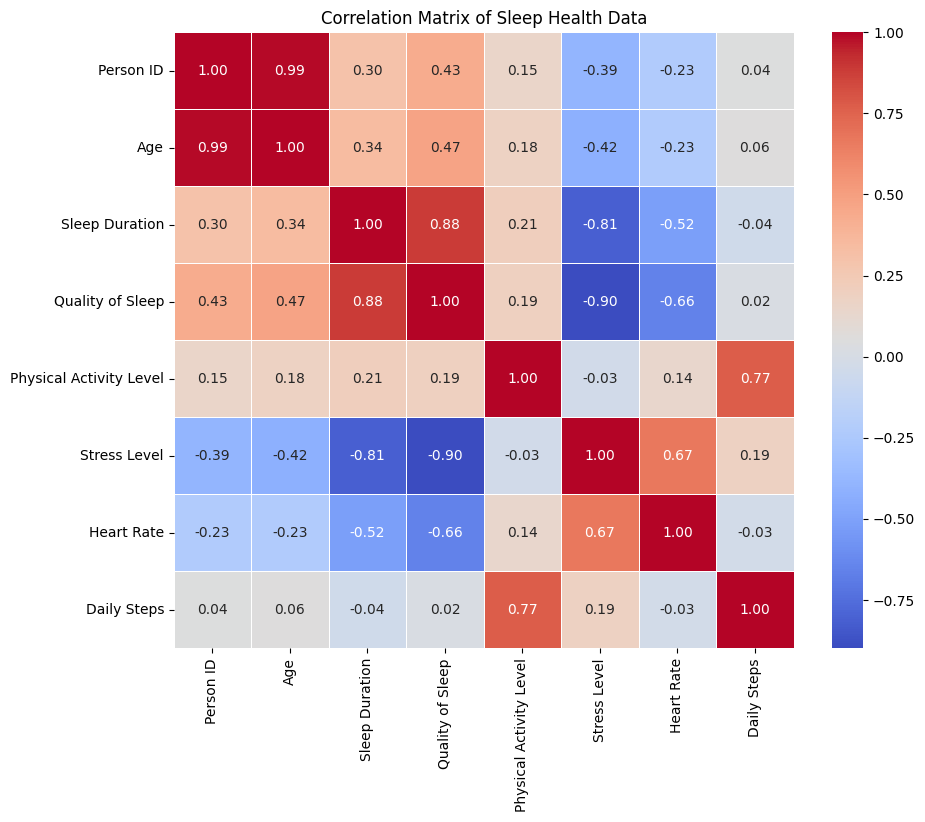

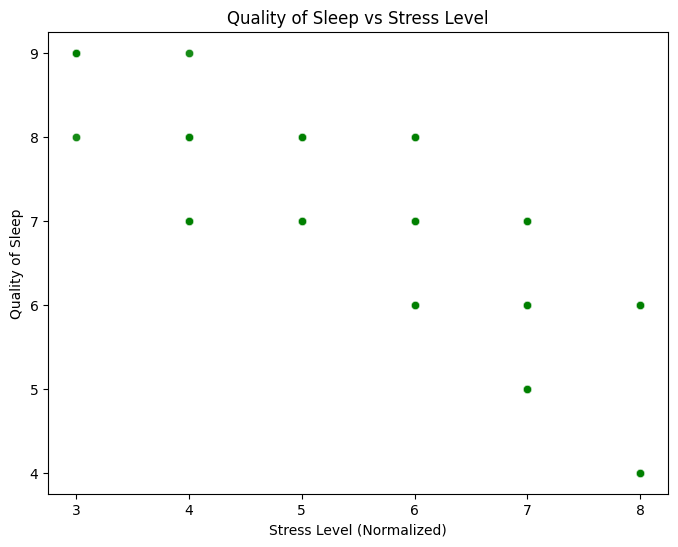

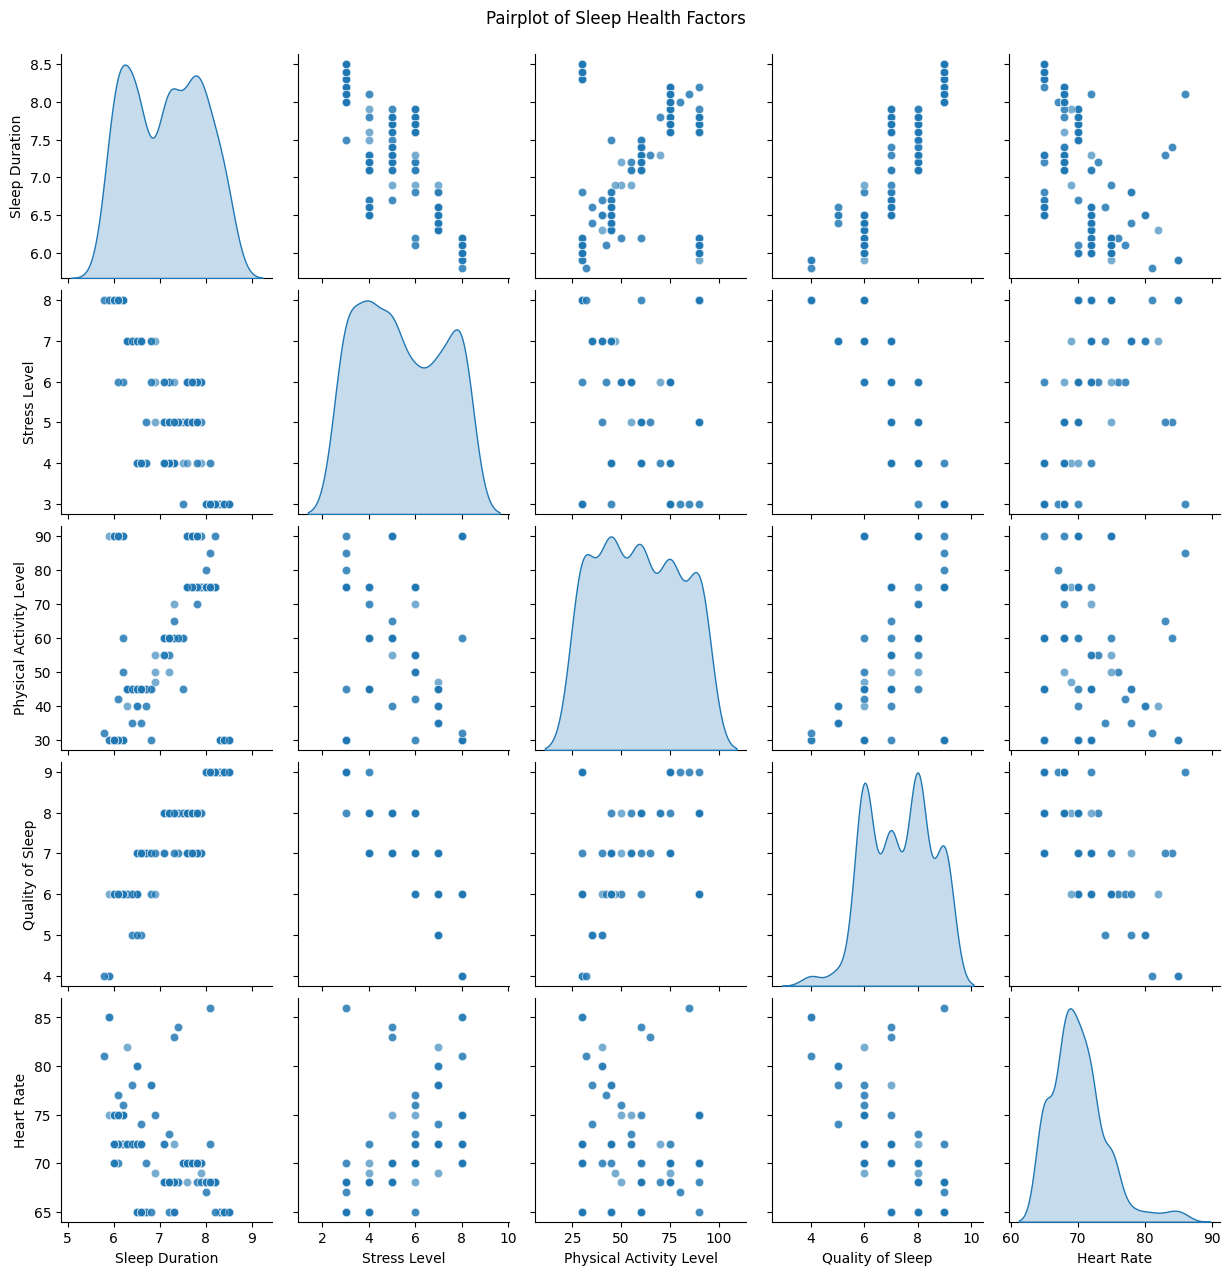

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import pandas as pd
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")

print("Path to dataset files:", path)
file_path = "/root/.cache/kagglehub/datasets/uom190346a/sleep-health-and-lifestyle-dataset/versions/2/Sleep_health_and_lifestyle_dataset.csv"
data = pd.read_csv(file_path)

# Distribution of Sleep Duration
plt.figure(figsize=(8, 6))
sns.histplot(data['Sleep Duration'], kde=True, color='blue')
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (Normalized)')
plt.ylabel('Frequency')
plt.show()

# Correlation Heatmap with only numerical columns
plt.figure(figsize=(10, 8))

# Selecting only numerical columns for correlation
numerical_columns = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix of Sleep Health Data')
plt.show()

# Scatter plot for Stress Level vs Quality of Sleep
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Stress Level', y='Quality of Sleep', alpha=0.7, color='green')
plt.title('Quality of Sleep vs Stress Level')
plt.xlabel('Stress Level (Normalized)')
plt.ylabel('Quality of Sleep')
plt.show()


#Pairplot for Visualizing Relationships
sns.pairplot(data, vars=['Sleep Duration', 'Stress Level', 'Physical Activity Level', 'Quality of Sleep', 'Heart Rate'],
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Sleep Health Factors', y=1.02)
plt.show()


Model Performance Metrics:
Mean Absolute Error (MAE): 0.1786
Mean Squared Error (MSE): 0.0603
Root Mean Squared Error (RMSE): 0.2455
R-squared Score: 0.9600


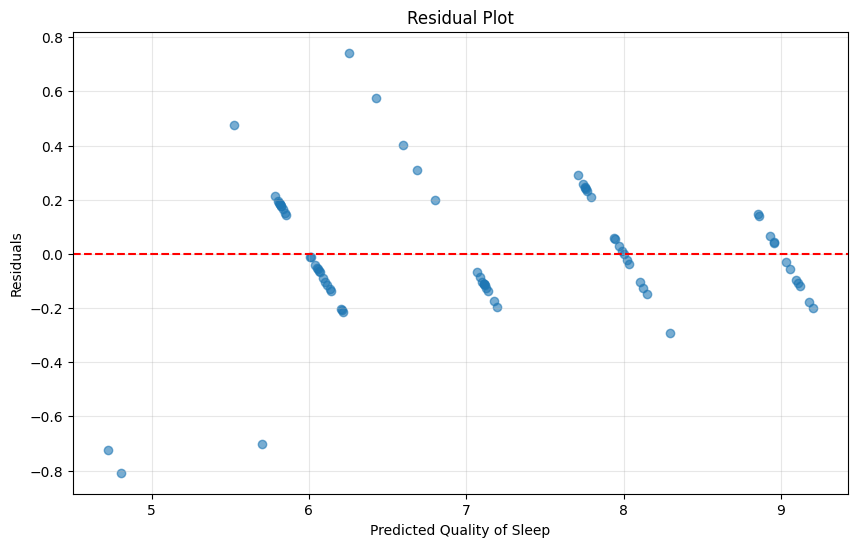

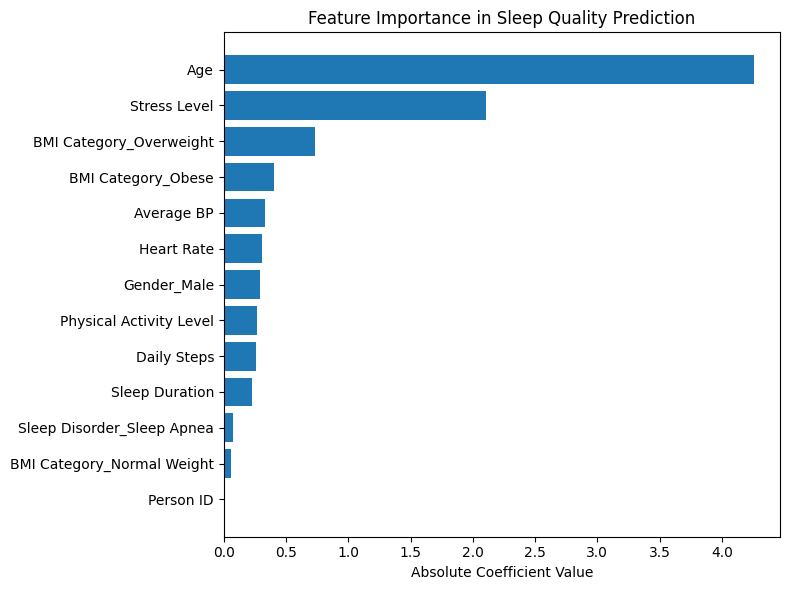

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print detailed metrics
print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Create residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Quality of Sleep')
plt.ylabel('Residuals')
plt.grid(True, alpha=0.3)
plt.show()

# Create feature importance plot
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': abs(model.coef_)
})

feature_importance = feature_importance.sort_values('Importance', ascending=True)
plt.figure(figsize=(8, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance in Sleep Quality Prediction')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()



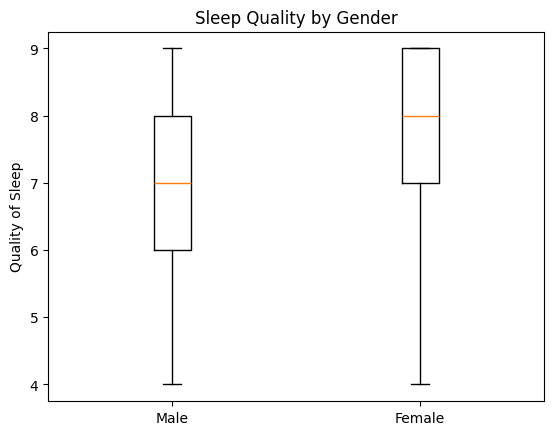

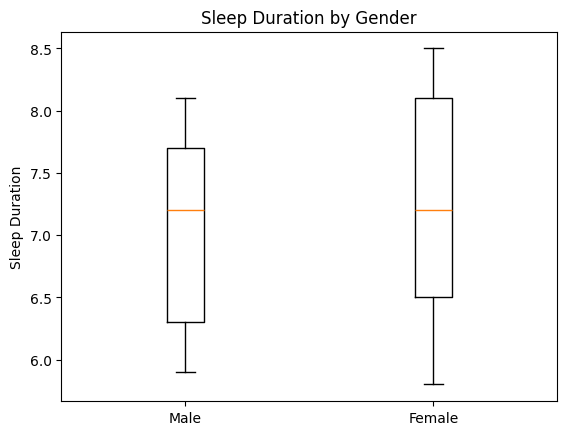


Summary Statistics:

Sleep Quality by Gender:
        count      mean       std  min  25%  50%  75%  max
Gender                                                    
Female  185.0  7.664865  1.279482  4.0  7.0  8.0  9.0  9.0
Male    189.0  6.968254  0.999493  4.0  6.0  7.0  8.0  9.0

Sleep Duration by Gender:
        count      mean       std  min  25%  50%  75%  max
Gender                                                    
Female  185.0  7.229730  0.879434  5.8  6.5  7.2  8.1  8.5
Male    189.0  7.036508  0.693197  5.9  6.3  7.2  7.7  8.1


In [ ]:
# Box Plot for Sleep Quality by Gender
plt.boxplot([data[data['Gender'] == 'Male']['Quality of Sleep'], data[data['Gender'] == 'Female']['Quality of Sleep']],
            labels=['Male', 'Female'])
plt.title('Sleep Quality by Gender')
plt.ylabel('Quality of Sleep')
plt.show()

plt.boxplot([data[data['Gender'] == 'Male']['Sleep Duration'], data[data['Gender'] == 'Female']['Sleep Duration']],
            labels=['Male', 'Female'])
plt.title('Sleep Duration by Gender')
plt.ylabel('Sleep Duration')
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("\nSleep Quality by Gender:")
print(data.groupby('Gender')['Quality of Sleep'].describe())
print("\nSleep Duration by Gender:")
print(data.groupby('Gender')['Sleep Duration'].describe())